In [ ]:
# 1. Creating Manipulating Arrays 

In [18]:
import numpy as np 
from matplotlib import pyplot as plt

In [56]:
# 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan

x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)

xx,yy = np.meshgrid(x_range,y_range)

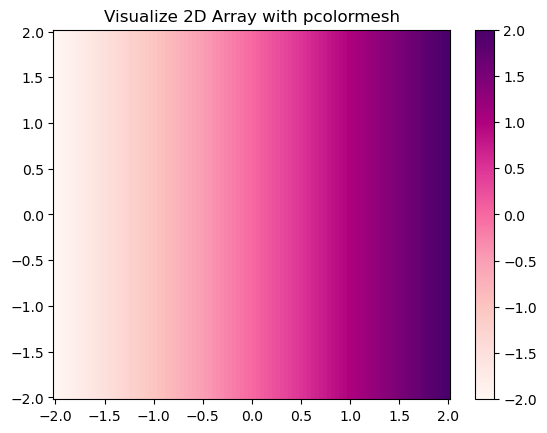

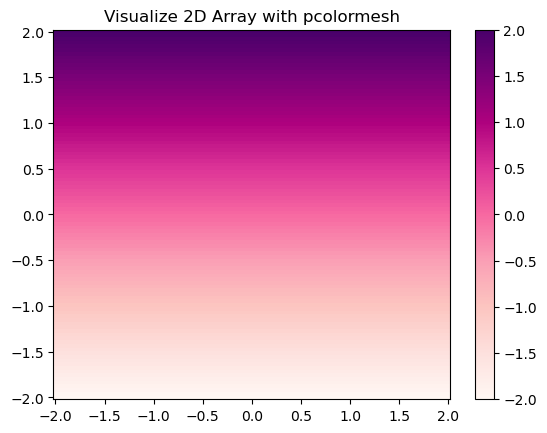

In [59]:
# 1.2 Visualize each 2D array using pcolormesh 
plt.pcolormesh(x_range, y_range, xx, cmap='RdPu')
plt.colorbar()
plt.title('Visualize 2D Array with pcolormesh')e
plt.show()

plt.pcolormesh(x_range, y_range, yy, cmap='RdPu')
plt.colorbar()
plt.title('Visualize 2D Array with pcolormesh')
plt.show()

In [125]:
# 1.3 
#conversion formula 
r = np.sqrt(xx**2 + yy**2)
φ = np.arctan2(yy,xx)
rr,pp = np.meshgrid(r,φ)

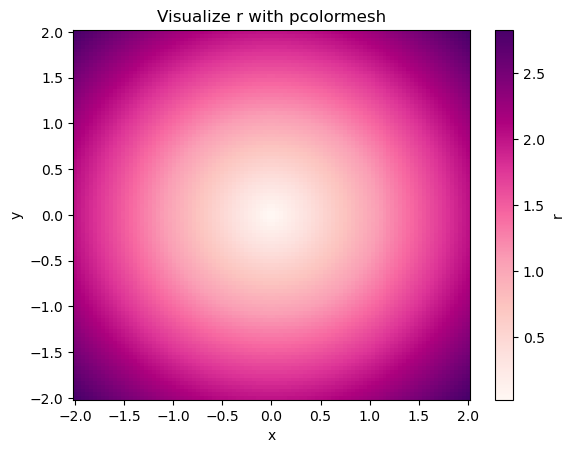

In [133]:
#1.4 
plt.pcolormesh(xx, yy, r, cmap='RdPu', shading='auto')  # Use xx and yy for grid
plt.colorbar(label='r')
plt.title('Visualize r with pcolormesh')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

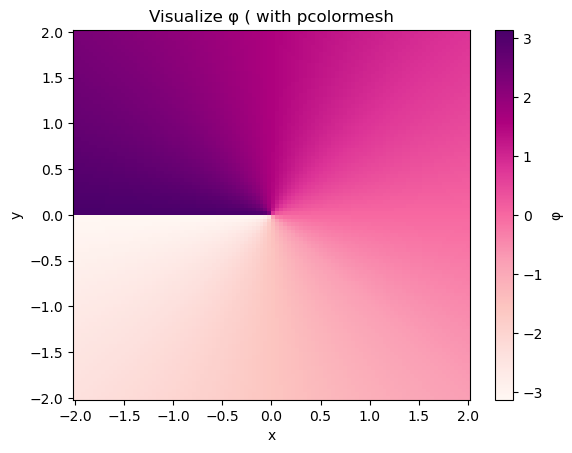

In [138]:
#1.4
plt.pcolormesh(xx, yy, φ, cmap='RdPu', shading='auto')  # Use xx and yy for grid
plt.colorbar(label='φ')
plt.title('Visualize φ ( with pcolormesh')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0.5, 1.0, 'Plotted Function')

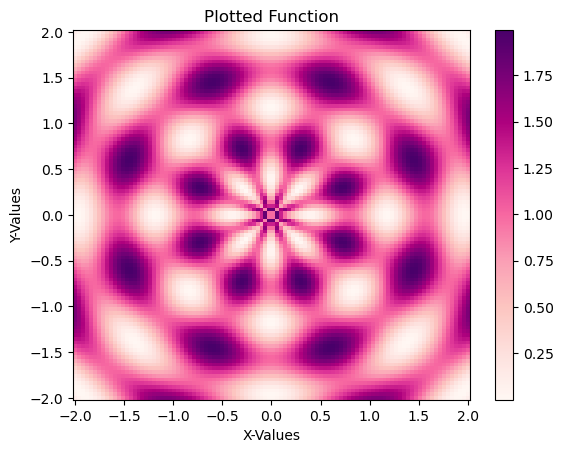

In [203]:
# 1.5 Calculate the quantity of f= cos^2(4) + sin^2(4) and plot it on the x/y plane
f = np.power(np.cos(4*r), 2) + np.power(np.sin(4*φ), 2)
plt.pcolormesh(xx, yy, f, cmap ='RdPu')
plt.colorbar ()
plt.xlabel ("X-Values")
plt.ylabel ("Y-Values")
plt.title('Plotted Function')

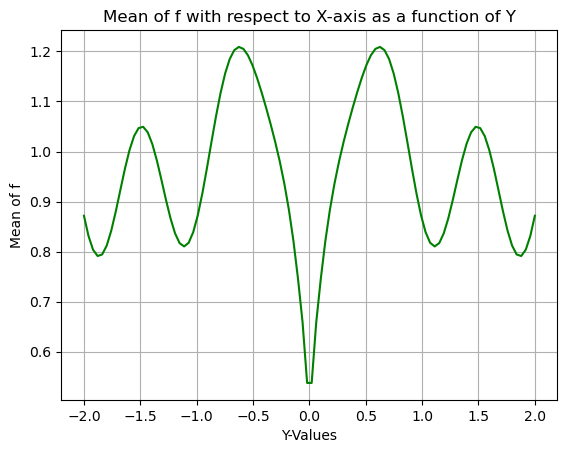

In [162]:
# 1.6 Calculate the mean of f with respect to the x-axis as a function of y
mean_f = np.mean(f, axis=1)  
plt.plot(y_range, mean_f, color='g')
plt.title('Mean of f with respect to X-axis as a function of Y')
plt.xlabel("Y-Values")
plt.ylabel("Mean of f")
plt.grid()
plt.show()

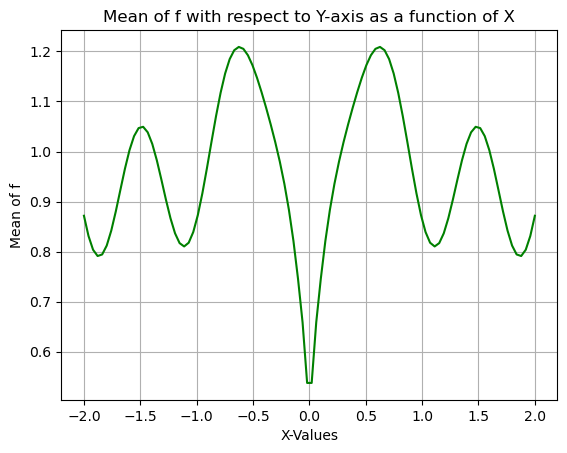

In [163]:
# 1.7 Calculate the mean of f with respect to the y-axis as a function of x
mean_f_y = np.mean(f, axis=0) 
plt.plot(x_range, mean_f_y, color='g')
plt.title('Mean of f with respect to Y-axis as a function of X')
plt.xlabel("X-Values")
plt.ylabel("Mean of f")
plt.grid()
plt.show()

In [150]:
# Part 2: Analyze ARGO Data

#loading each data file as numpy array 

import zipfile 
import numpy as np 
import os 

zip_file_path = '/data9/UN3400/work/tkc2125/float_data_assign3.zip'
extract_folder = '/data9/UN3400/work/tkc2125/float_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
print(zip_ref.namelist())


['float_data/', 'float_data/date.npy', 'float_data/T.npy', 'float_data/S.npy', 'float_data/P.npy', 'float_data/levels.npy', 'float_data/lon.npy', 'float_data/lat.npy']


In [151]:
#2.1 Load each data file as a numpy array 
T = np.load(os.path.join(extract_folder, 'float_data/T.npy'))
S = np.load(os.path.join(extract_folder, 'float_data/S.npy'))
P = np.load(os.path.join(extract_folder, 'float_data/P.npy'))
date = np.load(os.path.join(extract_folder, 'float_data/date.npy'))
lat = np.load(os.path.join(extract_folder, 'float_data/lat.npy'))
lon = np.load(os.path.join(extract_folder, 'float_data/lon.npy'))
level = np.load(os.path.join(extract_folder, 'float_data/levels.npy'))

In [204]:
#2.2 Examine the shapes 
print("Temperature shape:", T.shape)
print("Salinity shape:", S.shape)
print("Pressure shape:", P.shape)
print("Latitude shape:", lat.shape)
print("Longitude shape:", lon.shape)
print("Date shape:", date.shape)
print("Level shape:", level.shape)

# Based on the shapes, which dimensions do you think are shared among the arrays?

#The dimensions shared among the arrays are salinity, temperature, and pressure given that they share the same dimesions of (x,y). As for longitude, latitude, date, and level they share the (x,) dimensions. 

Temperature shape: (78, 75)
Salinity shape: (78, 75)
Pressure shape: (78, 75)
Latitude shape: (75,)
Longitude shape: (75,)
Date shape: (75,)
Level shape: (78,)


In [169]:
print("Temperature Array:")
print(T)
Temperature Array 

Temperature Array:
[[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]


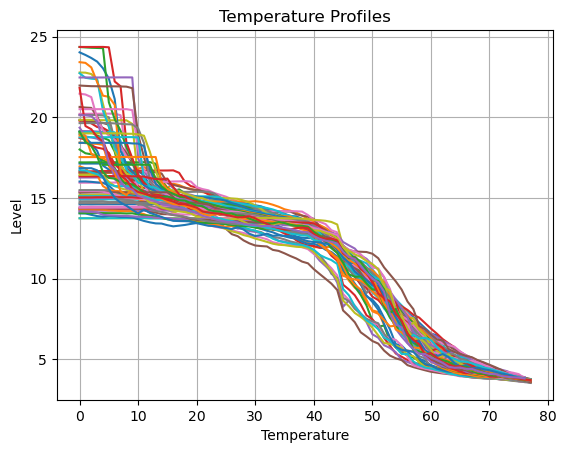

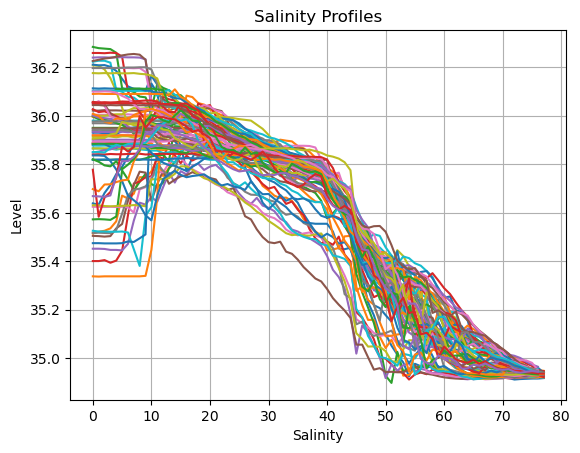

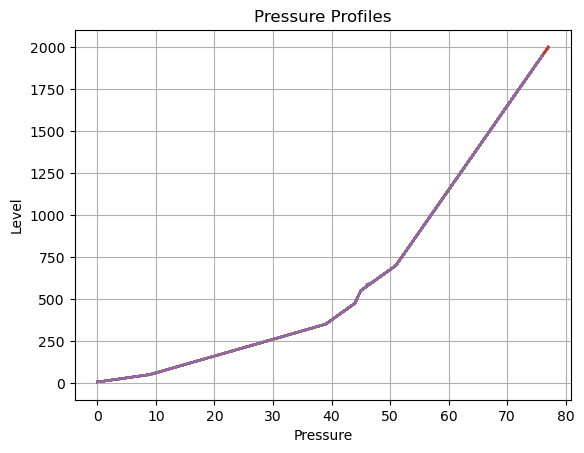

In [174]:
#2.3 Make a plot for each column of data in T, S and P (three plots).

plt.plot(T)
plt.title('Temperature Profiles')
plt.xlabel('Temperature')
plt.ylabel('Level')
plt.grid()
plt.show()


plt.plot(S)
plt.title('Salinity Profiles')
plt.xlabel('Salinity')
plt.ylabel('Level')
plt.grid()
plt.show()

plt.plot(P)
plt.title('Pressure Profiles')
plt.xlabel('Pressure')
plt.ylabel('Level')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Temperature Mean and Standard Deviation')

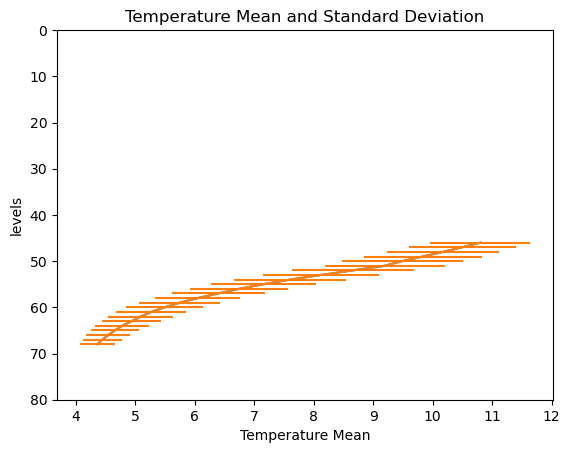

In [209]:
#2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.
#2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

mean_T = T.mean (1)
std_T = T.std (1)

plt.plot(mean_T, levels) 
plt.ylim(80,0)
plt.errorbar(mean_T, levels, xerr = std_T)

plt.xlabel("Temperature Mean")
plt.ylabel("levels")
plt.title("Temperature Mean and Standard Deviation")

Text(0.5, 1.0, 'Pressure Mean and Standard Deviation')

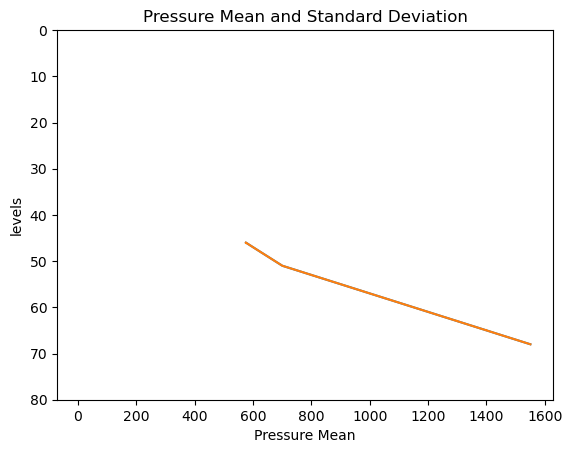

In [210]:
mean_P = P.mean (1)
std_P = P.std (1)

plt.plot(mean_P, levels) 
plt.ylim(80,0)
plt.errorbar(mean_P, levels, xerr = std_P)
plt.xlabel("Pressure Mean")
plt.ylabel("levels")
plt.title("Pressure Mean and Standard Deviation")

Text(0.5, 1.0, 'Salinity Mean and Standard Deviation')

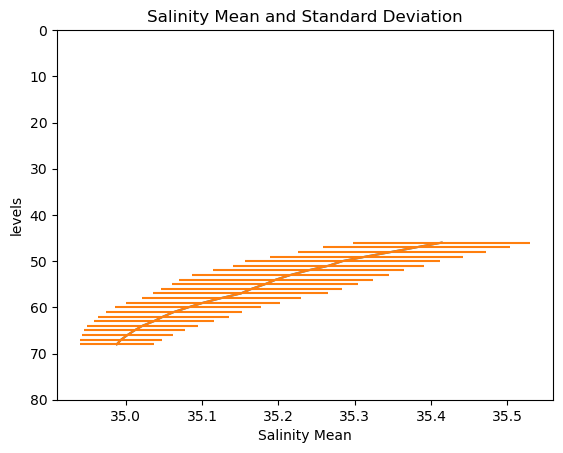

In [211]:
mean_S = S.mean (1)
std_S = S.std (1)

plt.plot(mean_S, levels) 
plt.ylim(80,0)
plt.errorbar(mean_S, levels, xerr = std_S)
plt.xlabel("Salinity Mean")
plt.ylabel("levels")
plt.title("Salinity Mean and Standard Deviation")

Text(0.5, 1.0, 'Temperature Mean and Standard Deviation')

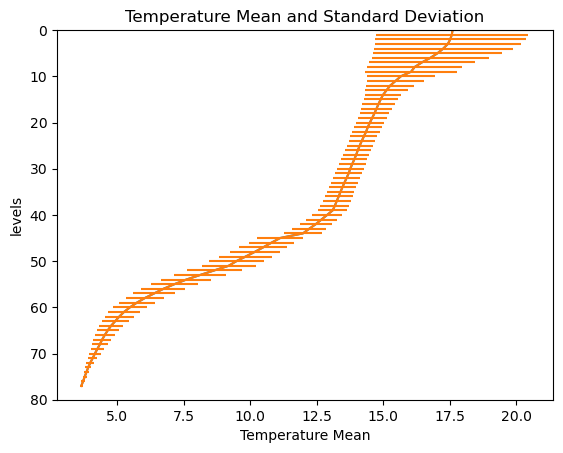

In [212]:
# 2.6 Account For Missing Data
T_nanmean = np.nanmean(T, axis =1)
T_nanstd = np.nanstd (T, axis =1)

plt.plot(T_nanmean, levels) 
plt.ylim(80,0)
plt.errorbar(T_nanmean, levels, xerr = T_nanstd)
plt.xlabel("Temperature Mean")
plt.ylabel("levels")
plt.title("Temperature Mean and Standard Deviation")

Text(0.5, 1.0, 'Salinity Mean and Standard Deviation')

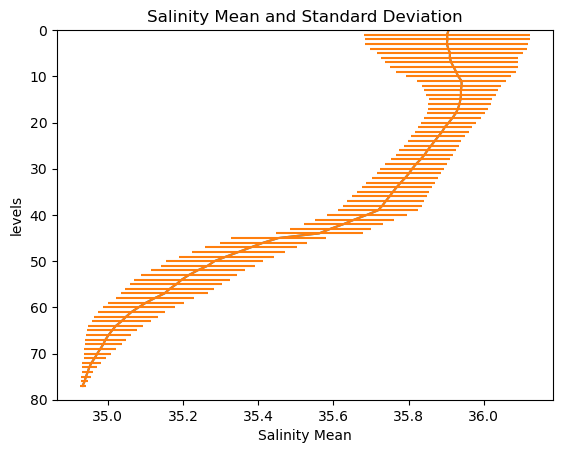

In [213]:
S_nanmean = np.nanmean(S, axis =1)
S_nanstd = np.nanstd (S, axis =1)

plt.plot(S_nanmean, levels) 
plt.ylim(80,0)
plt.errorbar(S_nanmean, levels, xerr = S_nanstd)
plt.xlabel("Salinity Mean")
plt.ylabel("levels")
plt.title("Salinity Mean and Standard Deviation")

Text(0.5, 1.0, 'Pressure Mean and Standard Deviation')

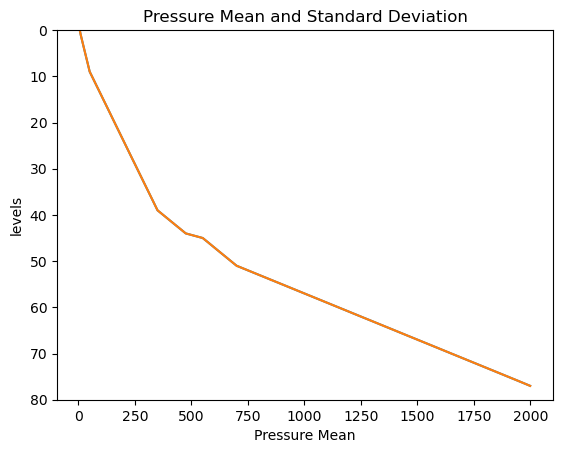

In [214]:
P_nanmean = np.nanmean(P, axis =1)
P_nanstd = np.nanstd (P, axis =1)

plt.plot(P_nanmean, levels) 
plt.ylim(80,0)
plt.errorbar(P_nanmean, levels, xerr = P_nanstd)
plt.xlabel("Pressure Mean")
plt.ylabel("levels")
plt.title("Pressure Mean and Standard Deviation")

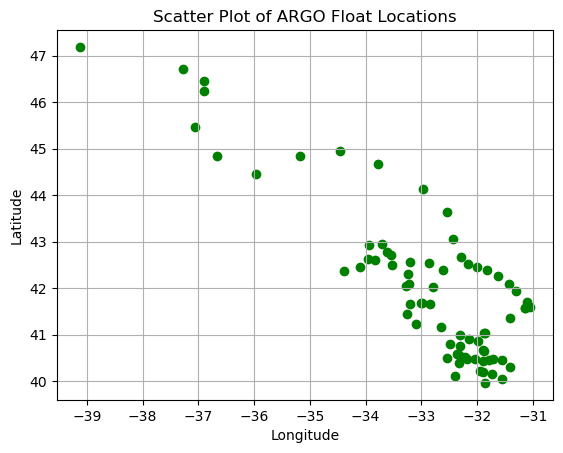

In [185]:
#2.7 
# Create a scatter plot of longitude and latitude
plt.scatter(lon, lat, color='g',)
plt.title('Scatter Plot of ARGO Float Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()